# EDA and Cleaning

### Setup

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
import json

In [ ]:
# Reading in data
dw = pd.read_csv("./silentsignals_dw.csv")

Mounted at /content/drive


The source for the raw data above can be found here: https://huggingface.co/datasets/SALT-NLP/silent_signals

### Exploratory Data Analysis

In [ ]:
# Observing data set
dw.head()

,dog_whistle,dog_whistle_root,ingroup,content,date,speaker,chamber,subreddit,source,definition,type,party
0,SJW,social justice warrior,anti-liberal,Far left SJW/Woke activists use a variety of w...,06/03/2023,NaN,NaN,goldandblack,PRAW API,liberals,Informal,NaN
1,SJW,social justice warrior,anti-liberal,1) Relax. We don’t need SJW-lites commenting o...,08/03/2017,NaN,NaN,The_Donald,PRAW API,liberals,Informal,NaN
2,SJW,social justice warrior,anti-liberal,"Sure, Tifa is extreme (Advent Children is fine...",01/30/2016,NaN,NaN,TumblrInAction,PRAW API,liberals,Informal,NaN
3,SJWs,social justice warrior,anti-liberal,Sure theyve made a lot of decisions I as a gam...,06/15/2015,NaN,NaN,TumblrInAction,PRAW API,liberals,Informal,NaN
4,SJWs,social justice warrior,anti-liberal,I disagree. Wanting fair treatment and the fur...,08/31/2015,NaN,NaN,TumblrInAction,PRAW API,liberals,Informal,NaN


In [ ]:
# Variable descriptions
dw.describe()

,dog_whistle,dog_whistle_root,ingroup,content,date,speaker,chamber,subreddit,source,definition,type,party
count,16258,16258,16258,16258,16258,3335,3335,12923,16258,16258,16258,3251
unique,706,298,18,16199,5028,1109,2,47,4,244,2,6
top,welfare,social justice warrior,racist,"So you say stuff like, uh, forced busing, stat...",11/10/2016,Unknown,H,The_Donald,Pushift 2005-2022,liberals,Informal,R
freq,457,720,5129,12,28,84,1895,5712,9720,852,12923,1761


In [ ]:
# Missing value counts
dw.isna().sum()

,0
dog_whistle,0
dog_whistle_root,0
ingroup,0
content,0
date,0
speaker,12923
chamber,12923
subreddit,3335
source,0
definition,0


<Axes: xlabel='dog_whistle'>

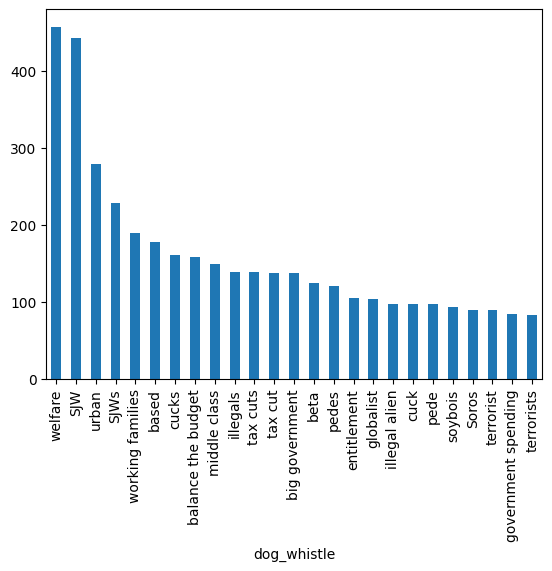

In [ ]:
# 25 Most common dog whistles
dw["dog_whistle"].value_counts()[0:25].plot(kind='bar')

<Axes: xlabel='ingroup'>

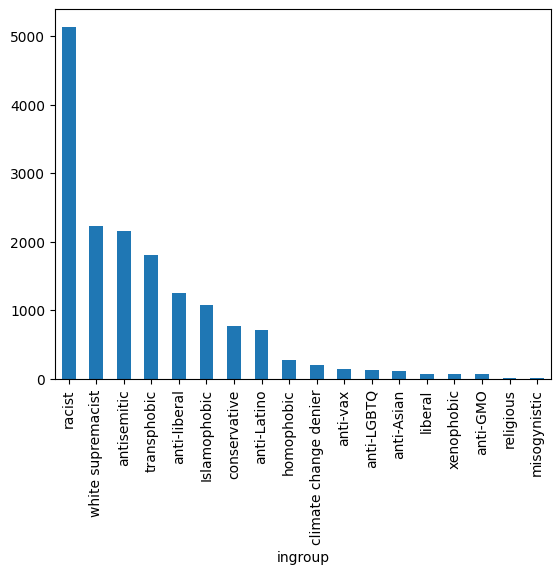

In [ ]:
# Most common ingroups dog whistles were directed towards
dw["ingroup"].value_counts().plot(kind='bar')

### Cleaning and Preprocessing dog whistle data set

In [ ]:
# Stripping character feature text
for i in dw.content:
    i.strip()

In [ ]:
# Stripping new line "\n" from text
dw.content = [i.replace("\n", " ") for i in dw.content]

### Second data set (noise)

In [ ]:
# Reading in data set serving as non-dog whistle coded text
import gzip
import json
from google.colab import drive

with gzip.open('./RS_2013-12.jsonl.gz', 'rt', encoding='utf-8') as f:
    other_posts = [json.loads(line) for line in f] # This data set will add diversity (non-dog whistles) to the target class

In [ ]:
# Converting to data frame from JSON
other_posts = pd.DataFrame(other_posts)

In [ ]:
# Randomly selecting a proportional number of non-dog whistle posts
other_posts = other_posts.sample(n=16000)

In [ ]:
# Stripping character features
for i in other_posts['body']:
    i.strip()

other_posts['body'] = [i.replace('\n\n', ' ') for i in other_posts['body']]
other_posts['body'] = [i.replace('\n', ' ') for i in other_posts['body']]

In [ ]:
# Observing data
other_posts.head()

,title,body,score,answers
25916,[22/F] Am I crazy to be wary of a woman [22/F]...,This is a throwaway account. **Warning: long p...,5,"[{'body': 'As a professional worrier, I sugges..."
85406,Could you warm the equator of water ice moons ...,I'm thinking of the water ice moons of the out...,3,[{'body': 'If you have the technology availabl...
124904,DM in Crisis here. How/why can people attack t...,"So i had the sitdown with my group, asked them...",7,[{'body': 'There are three kinds of Time Trave...
64958,"Does anyone else here search ""Harmontown"" on t...",Just wondering if I'm alone on this. I live on...,4,[{'body': 'You should also check out #nerdmelt...
129366,Question for drivers in busy areas.,Hey guys. I'm a 6 year delivery driver...i lik...,13,[{'body': 'I work for a downtown Dominos for a...


### Consolidated data set of posts with and without dogwhistles

In [ ]:
# List of dog whistle posts
dw_posts = list(dw.content)

# List of non-dog whistle posts
other_posts_posts = list(other_posts.body)

In [ ]:
# Concatening posts vertically and creating data frame
all_posts = pd.DataFrame({
    "posts" : dw_posts + other_posts_posts
})

# Creating target variable feature (1=dw, 0=no dw)
all_posts['dw'] = [1 if i in dw_posts else 0 for i in all_posts.posts ]

In [ ]:
# Scrambling rows
all_posts = all_posts.sample(frac=1).reset_index(drop=True)

In [ ]:
# Observing consolidated data set
all_posts.head()

,posts,dw
0,And the bill is a towering list of radical lib...,1
1,I'm going to try and make this short and sweet...,0
2,US actions in El Salvador that led to the El M...,1
3,###XDG GAMING (XDG) 0-2 GAMBIT GAMING (GMB) ...,0
4,... just how many women are turned away for sc...,1


In [ ]:
# Exporting all posts df
all_posts.to_csv('all_posts.csv', index=False)